In [1]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', sep=',', na_values=' ?').dropna()


In [2]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [4]:
le = LabelEncoder()
for col in df[["NObeyesdad", "Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "CALC", "MTRANS", "SCC"]]:
    df[col] = le.fit_transform(df[col])

X = df.drop("NObeyesdad", axis=1)
y = df['NObeyesdad']

## PCA 分群狀況視覺化

In [5]:
def PCA_illustrator(X ,label, title):
    from sklearn.decomposition import PCA
    from matplotlib.font_manager import FontProperties
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    # 上面這兩句有設應該就行了
    pca = PCA(2)
    data = pca.fit_transform(X)
    uniq = np.unique(label)   
    plt.figure(figsize=(10,10))
    for i in uniq:
        plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    #This is done to find the centroid for each clusters.
    plt.legend()
    plt.title(title)
    plt.show()

## DBSCAN 最佳距離判斷圖

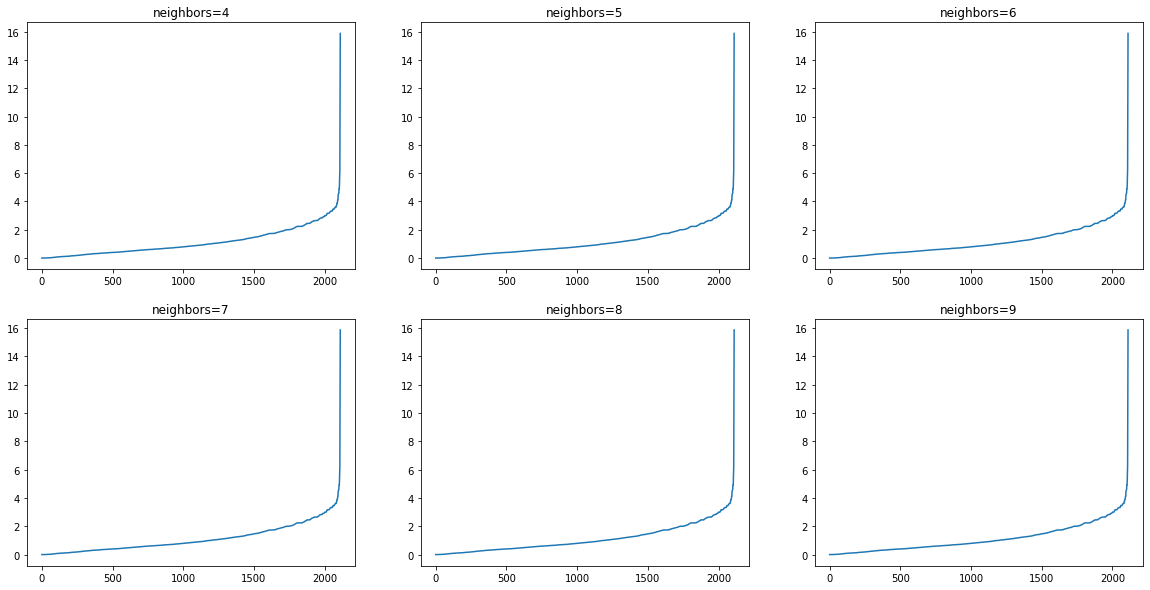

In [6]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

def Best_eps(X, min=4, max=10):
    if not(max - min == 6):
        print('範圍必須等於6')
    else:
        plt.figure(figsize=(20,10))
        for i in range(4, 10):
            neighbors = NearestNeighbors(n_neighbors=i)
            neighbors_fit = neighbors.fit(X)
            distances, indices = neighbors_fit.kneighbors(X)

            distances = np.sort(distances, axis=0)
            distances = distances[:,1]
            plt.subplot(2, 3, i - 3)
            plt.plot(distances)
            plt.title(f'neighbors={i}')
        plt.show()

Best_eps(X)

## 運行時間


In [7]:
if __name__ == '__main__':
    def k_mean():
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=7)
        kmeans.fit(X)
        pred_y = kmeans.predict(X)
        centroids = kmeans.cluster_centers_
        return pred_y

    def AgglomerativeClustering():
        from sklearn.cluster import AgglomerativeClustering
        ml = AgglomerativeClustering(
            n_clusters=7, affinity='euclidean', linkage='ward')
        pred_y = ml.fit_predict(X)
        return pred_y

    def DBSCAN(eps = 4, min_samples = 8):
        from sklearn.cluster import DBSCAN
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(X)
        pred_y = clustering.labels_
        clustering.n_jobs
        return pred_y


In [8]:
from timeit import timeit

X = df.drop("NObeyesdad", axis=1)
y = df['NObeyesdad']
le = LabelEncoder()
df["NObeyesdad"] = le.fit_transform(df["NObeyesdad"])

clusterList = ['k_mean', 'AgglomerativeClustering', 'DBSCAN']
for cluster in clusterList:
    t = timeit(f'{cluster}()', f'from __main__ import {cluster}', number=1)
    print(cluster, t)


k_mean 0.36472380000000015
AgglomerativeClustering 0.13029009999999985
DBSCAN 0.056418700000000044


## 純度


In [9]:
kmean_purity_list = []
Agglo_purity_list = []
DBSCAN_purity_list = []

In [10]:
#直接算純度

le = LabelEncoder()
df["NObeyesdad"] = le.fit_transform(df["NObeyesdad"])

X = df.drop("NObeyesdad", axis=1)
y = df['NObeyesdad']


def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


kmean_purity = purity_score(y, k_mean())
AgglomerativeClustering_purity = purity_score(y, AgglomerativeClustering())
print("kmean_purity", kmean_purity, "\nAgglomerativeClustering_purity",
      AgglomerativeClustering_purity)


print('DBSCAN_purity:')
DBSCAN_purity = 0
best_n = 0
for n in range(3, 40):
    p = purity_score(y, DBSCAN(4, min_samples=n))
    print(f"n = {n}:", p)
    if DBSCAN_purity < p :
        DBSCAN_purity = p
        best_n = n

print(f'Best_eps = {DBSCAN_purity}, n ={best_n}')

kmean_purity_list.append(kmean_purity)
Agglo_purity_list.append(AgglomerativeClustering_purity)
DBSCAN_purity_list.append(DBSCAN_purity)


kmean_purity 0.5253434391283752 
AgglomerativeClustering_purity 0.5329227854097585
DBSCAN_purity:
n = 3: 0.18000947418285174
n = 4: 0.18190431075319755
n = 5: 0.17953576504026528
n = 6: 0.19374703931785883
n = 7: 0.19469445760303175
n = 8: 0.1942207484604453
n = 9: 0.19043107531975367
n = 10: 0.18995736617716721
n = 11: 0.19043107531975367
n = 12: 0.19090478446234013
n = 13: 0.18995736617716721
n = 14: 0.1785883467550924
n = 15: 0.18758882046423497
n = 16: 0.18900994789199432
n = 17: 0.18711511132164851
n = 18: 0.18758882046423497
n = 19: 0.19516816674561818
n = 20: 0.18853623874940786
n = 21: 0.19753671245855045
n = 22: 0.19753671245855045
n = 23: 0.1980104216011369
n = 24: 0.21032685930838466
n = 25: 0.21080056845097112
n = 26: 0.19990525817148272
n = 27: 0.2008526764566556
n = 28: 0.20180009474182853
n = 29: 0.23685457129322596
n = 30: 0.23732828043581242
n = 31: 0.23732828043581242
n = 32: 0.23732828043581242
n = 33: 0.2382756987209853
n = 34: 0.23874940786357177
n = 35: 0.23874940

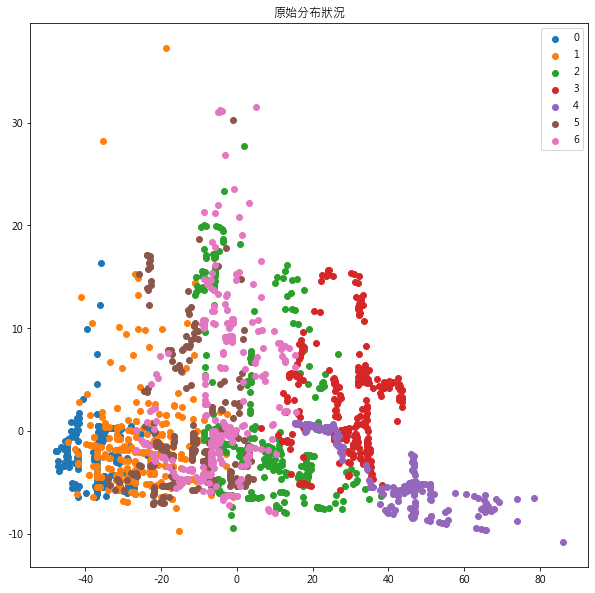

In [11]:
PCA_illustrator(X ,y, '原始分布狀況')

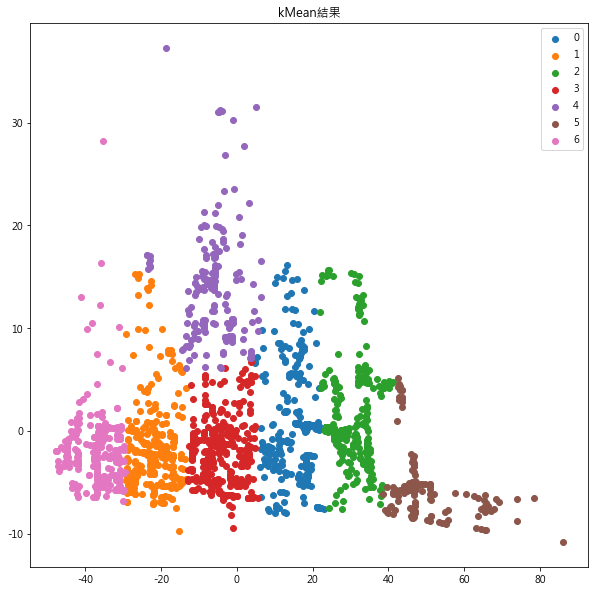

In [12]:
PCA_illustrator(X ,k_mean(), 'kMean結果')

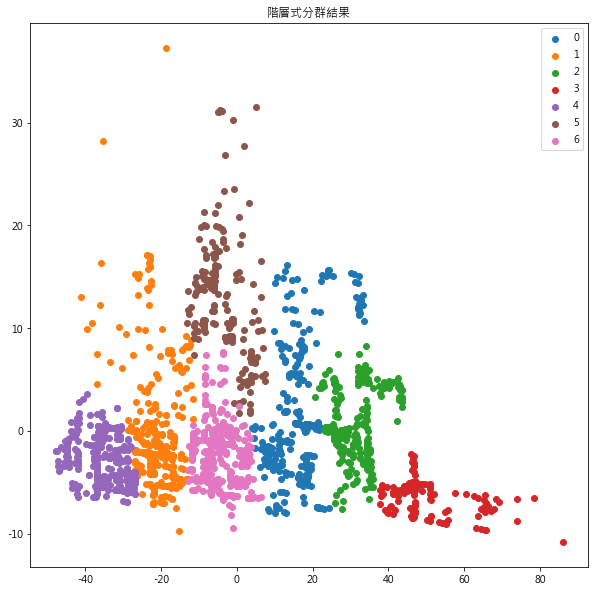

In [13]:
PCA_illustrator(X ,AgglomerativeClustering(), '階層式分群結果')

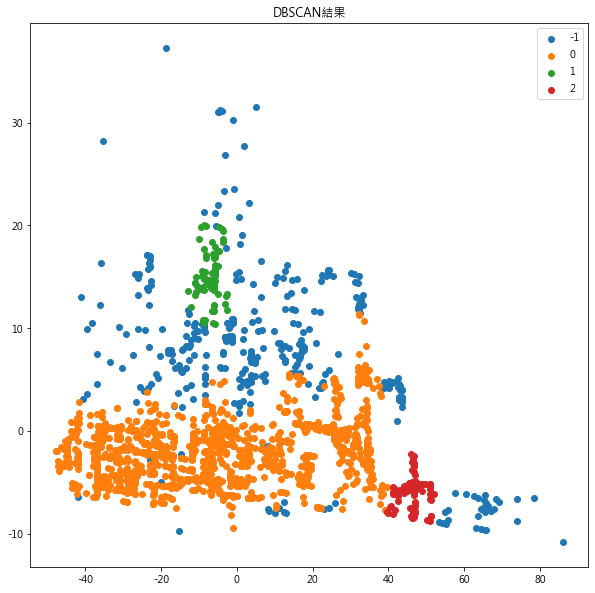

In [14]:
PCA_illustrator(X ,DBSCAN(eps=4, min_samples=best_n), 'DBSCAN結果')

## MAX-min標準化

In [15]:
#做 MAX-min標準化後純度
from sklearn.preprocessing import MinMaxScaler


le = LabelEncoder()
df["NObeyesdad"] = le.fit_transform(df["NObeyesdad"])

X = df.drop("NObeyesdad", axis=1)
y = df['NObeyesdad']

min_max = MinMaxScaler()
X = pd.DataFrame(min_max.fit_transform(X), columns=X.columns)

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


kmean_purity = purity_score(y, k_mean())
AgglomerativeClustering_purity = purity_score(y, AgglomerativeClustering())
print("kmean_purity", kmean_purity, "\nAgglomerativeClustering_purity",
      AgglomerativeClustering_purity)


print('DBSCAN_purity:')
DBSCAN_purity = 0
best_n = 0
for n in range(3, 40):
    p = purity_score(y, DBSCAN(eps=0.8, min_samples=n))
    print(f"n = {n}:", p)
    if DBSCAN_purity < p :
        DBSCAN_purity = p
        best_n = n

print(f'Best_eps = {DBSCAN_purity}, n ={best_n}')

kmean_purity_list.append(kmean_purity)
Agglo_purity_list.append(AgglomerativeClustering_purity)
DBSCAN_purity_list.append(DBSCAN_purity)

kmean_purity 0.4386546660350545 
AgglomerativeClustering_purity 0.4097584083372809
DBSCAN_purity:
n = 3: 0.4414969208905732
n = 4: 0.4414969208905732
n = 5: 0.4419706300331596
n = 6: 0.4419706300331596
n = 7: 0.4419706300331596
n = 8: 0.44291804831833254
n = 9: 0.4443391757460919
n = 10: 0.44386546660350545
n = 11: 0.4443391757460919
n = 12: 0.44386546660350545
n = 13: 0.4353387020369493
n = 14: 0.4268119374703932
n = 15: 0.4268119374703932
n = 16: 0.42160113690194223
n = 17: 0.4225485551871151
n = 18: 0.423495973472288
n = 19: 0.423495973472288
n = 20: 0.423495973472288
n = 21: 0.42396968261487444
n = 22: 0.423495973472288
n = 23: 0.42160113690194223
n = 24: 0.42112742775935574
n = 25: 0.42207484604452866
n = 26: 0.42112742775935574
n = 27: 0.41212695405021316
n = 28: 0.4107058266224538
n = 29: 0.4116532449076267
n = 30: 0.4116532449076267
n = 31: 0.4116532449076267
n = 32: 0.41212695405021316
n = 33: 0.41260066319279964
n = 34: 0.4130743723353861
n = 35: 0.4116532449076267
n = 36: 0.

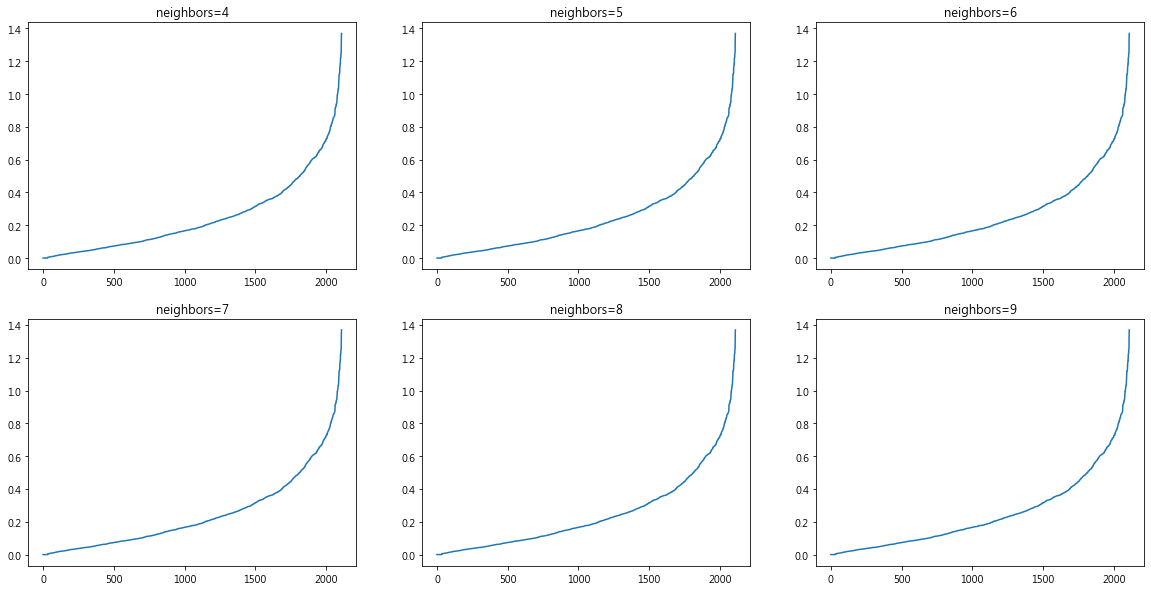

In [16]:
Best_eps(X)

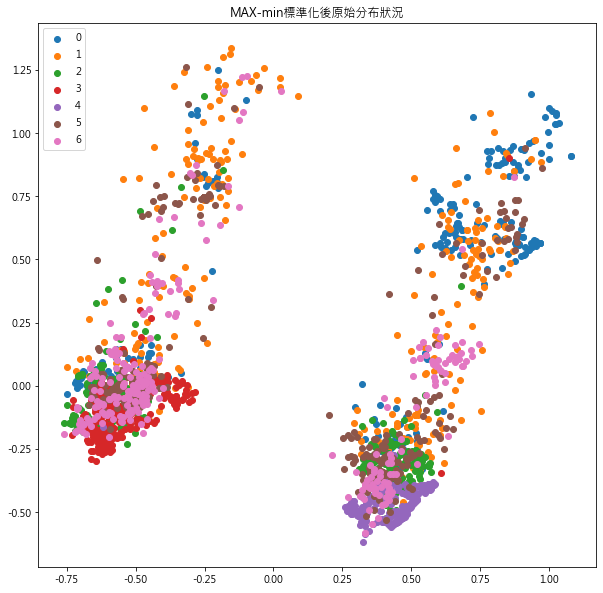

In [17]:
PCA_illustrator(X , y, 'MAX-min標準化後原始分布狀況')

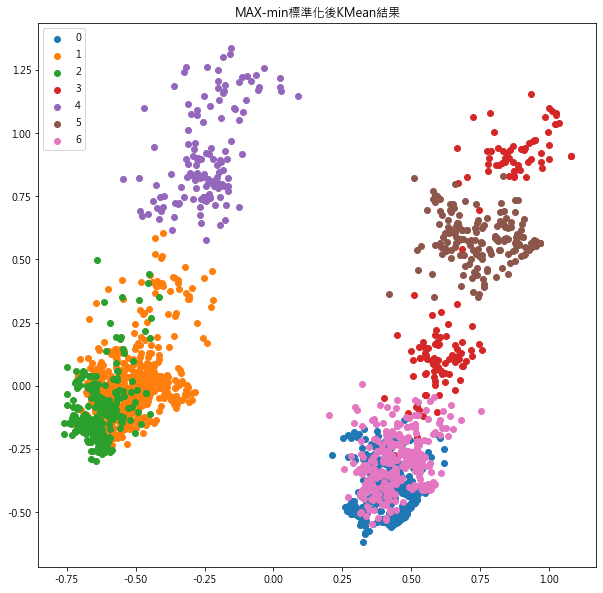

In [18]:
PCA_illustrator(X ,k_mean(), 'MAX-min標準化後KMean結果')

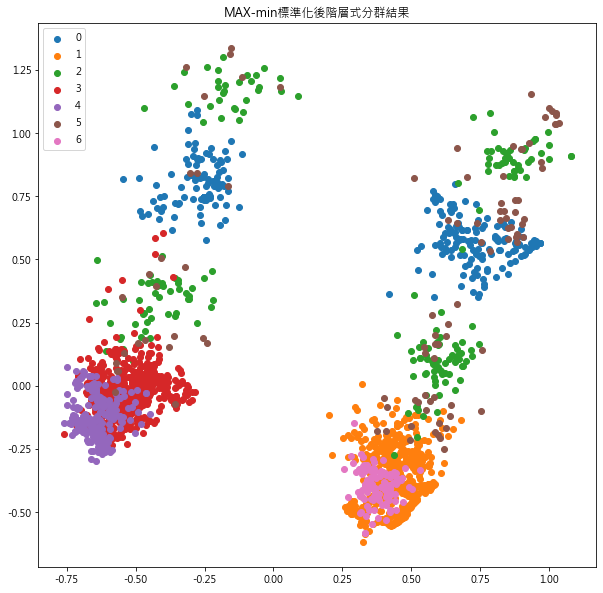

In [19]:
PCA_illustrator(X ,AgglomerativeClustering(), 'MAX-min標準化後階層式分群結果')

9


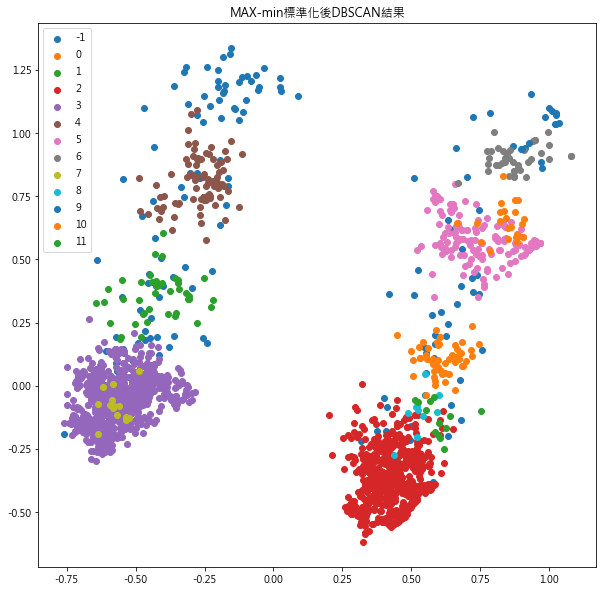

In [20]:
print(best_n)
PCA_illustrator(X ,DBSCAN(eps=0.8, min_samples=best_n), 'MAX-min標準化後DBSCAN結果')

## z-score 標準化

In [21]:
# z-score 標準化後純度
from sklearn.preprocessing import StandardScaler


le = LabelEncoder()
df["NObeyesdad"] = le.fit_transform(df["NObeyesdad"])

X = df.drop("NObeyesdad", axis=1)
y = df['NObeyesdad']

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


kmean_purity = purity_score(y, k_mean())
AgglomerativeClustering_purity = purity_score(y, AgglomerativeClustering())
print("kmean_purity", kmean_purity, "\nAgglomerativeClustering_purity",
      AgglomerativeClustering_purity)


print('DBSCAN_purity:')
DBSCAN_purity = 0
best_n = 0
for n in range(3, 40):
    p = purity_score(y, DBSCAN(eps=3, min_samples=n))
    print(f"n = {n}:", p)
    if DBSCAN_purity < p :
        DBSCAN_purity = p
        best_n = n

print(f'Best_eps = {DBSCAN_purity}, n ={best_n}')

kmean_purity_list.append(kmean_purity)
Agglo_purity_list.append(AgglomerativeClustering_purity)
DBSCAN_purity_list.append(DBSCAN_purity)

kmean_purity 0.42396968261487444 
AgglomerativeClustering_purity 0.4107058266224538
DBSCAN_purity:
n = 3: 0.25296068214116535
n = 4: 0.2591189009947892
n = 5: 0.2591189009947892
n = 6: 0.26054002842254853
n = 7: 0.2633822832780673
n = 8: 0.2638559924206537
n = 9: 0.2657508289909995
n = 10: 0.25959261013737567
n = 11: 0.25580293699668405
n = 12: 0.2572240644244434
n = 13: 0.2534343912837518
n = 14: 0.246328754144955
n = 15: 0.246328754144955
n = 16: 0.2482235907153008
n = 17: 0.25485551871151113
n = 18: 0.25485551871151113
n = 19: 0.25580293699668405
n = 20: 0.25248697299857886
n = 21: 0.24538133585978208
n = 22: 0.24680246328754146
n = 23: 0.2472761724301279
n = 24: 0.2482235907153008
n = 25: 0.24774988157271435
n = 26: 0.24774988157271435
n = 27: 0.24680246328754146
n = 28: 0.2482235907153008
n = 29: 0.24680246328754146
n = 30: 0.24680246328754146
n = 31: 0.2472761724301279
n = 32: 0.246328754144955
n = 33: 0.2472761724301279
n = 34: 0.24774988157271435
n = 35: 0.24774988157271435
n =

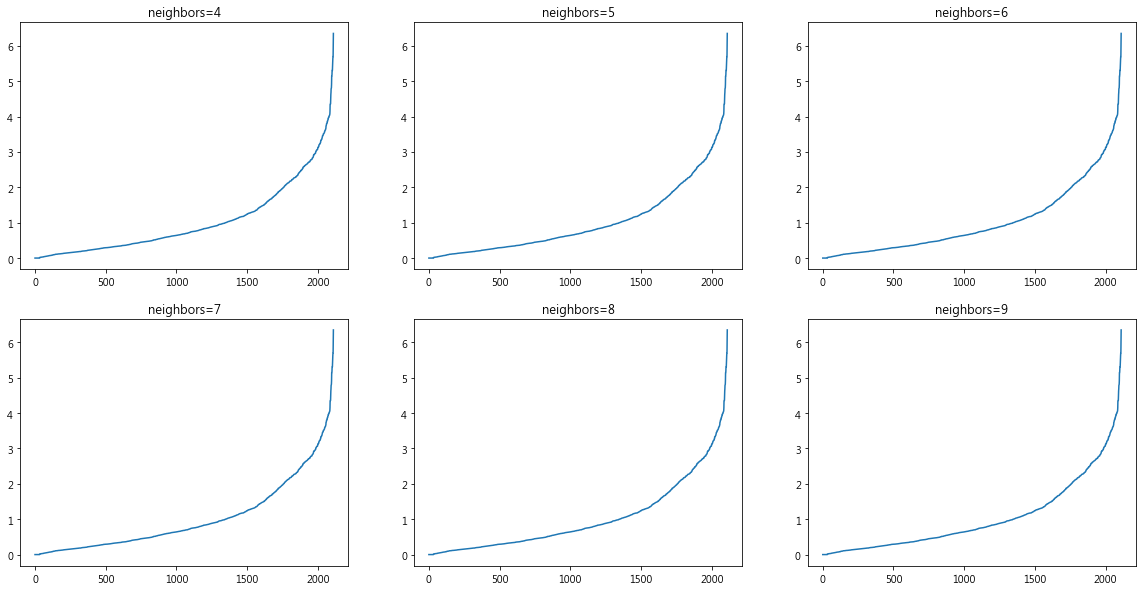

In [22]:
Best_eps(X)

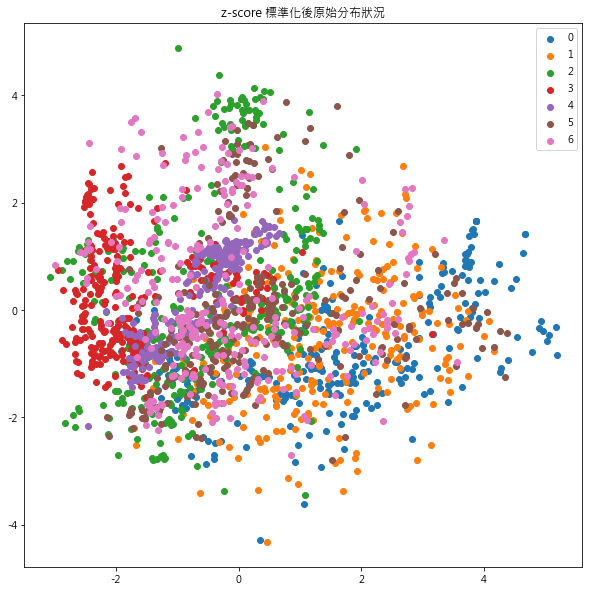

In [23]:
PCA_illustrator(X , y, 'z-score 標準化後原始分布狀況')

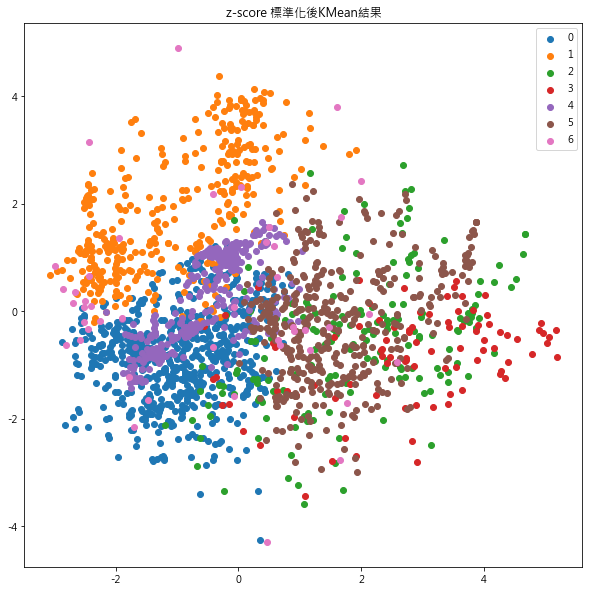

In [24]:
PCA_illustrator(X ,k_mean(), 'z-score 標準化後KMean結果')

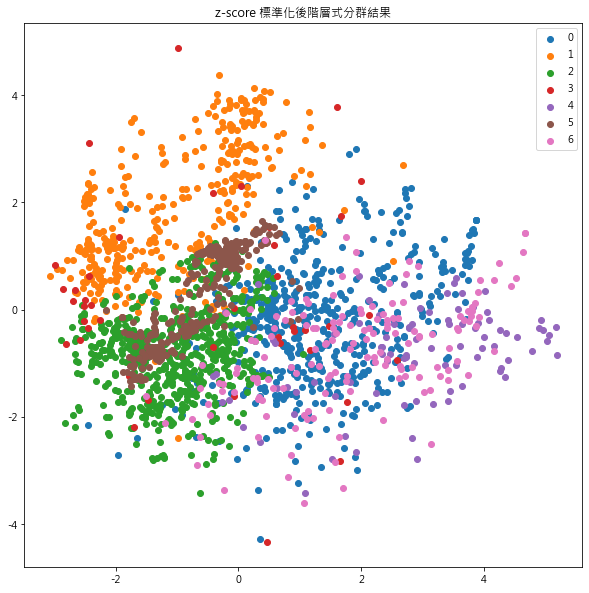

In [25]:
PCA_illustrator(X ,AgglomerativeClustering(), 'z-score 標準化後階層式分群結果')

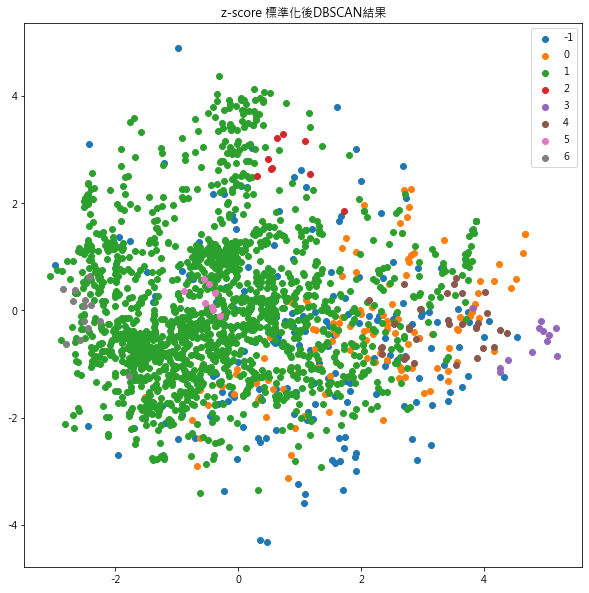

In [26]:
PCA_illustrator(X ,DBSCAN(eps=3, min_samples=best_n), 'z-score 標準化後DBSCAN結果')

## 結果整理

In [27]:
print('---直接處理---')
print(kmean_purity_list[0])
print(Agglo_purity_list[0])
print(DBSCAN_purity_list[0])
print('---MinMax處理---')
print(kmean_purity_list[1])
print(Agglo_purity_list[1])
print(DBSCAN_purity_list[1])
print('---Z-score處理---')
print(kmean_purity_list[2])
print(Agglo_purity_list[2])
print(DBSCAN_purity_list[2])

---直接處理---
0.5253434391283752
0.5329227854097585
0.23874940786357177
---MinMax處理---
0.4386546660350545
0.4097584083372809
0.4443391757460919
---Z-score處理---
0.42396968261487444
0.4107058266224538
0.2657508289909995


## 建構 dendrogram


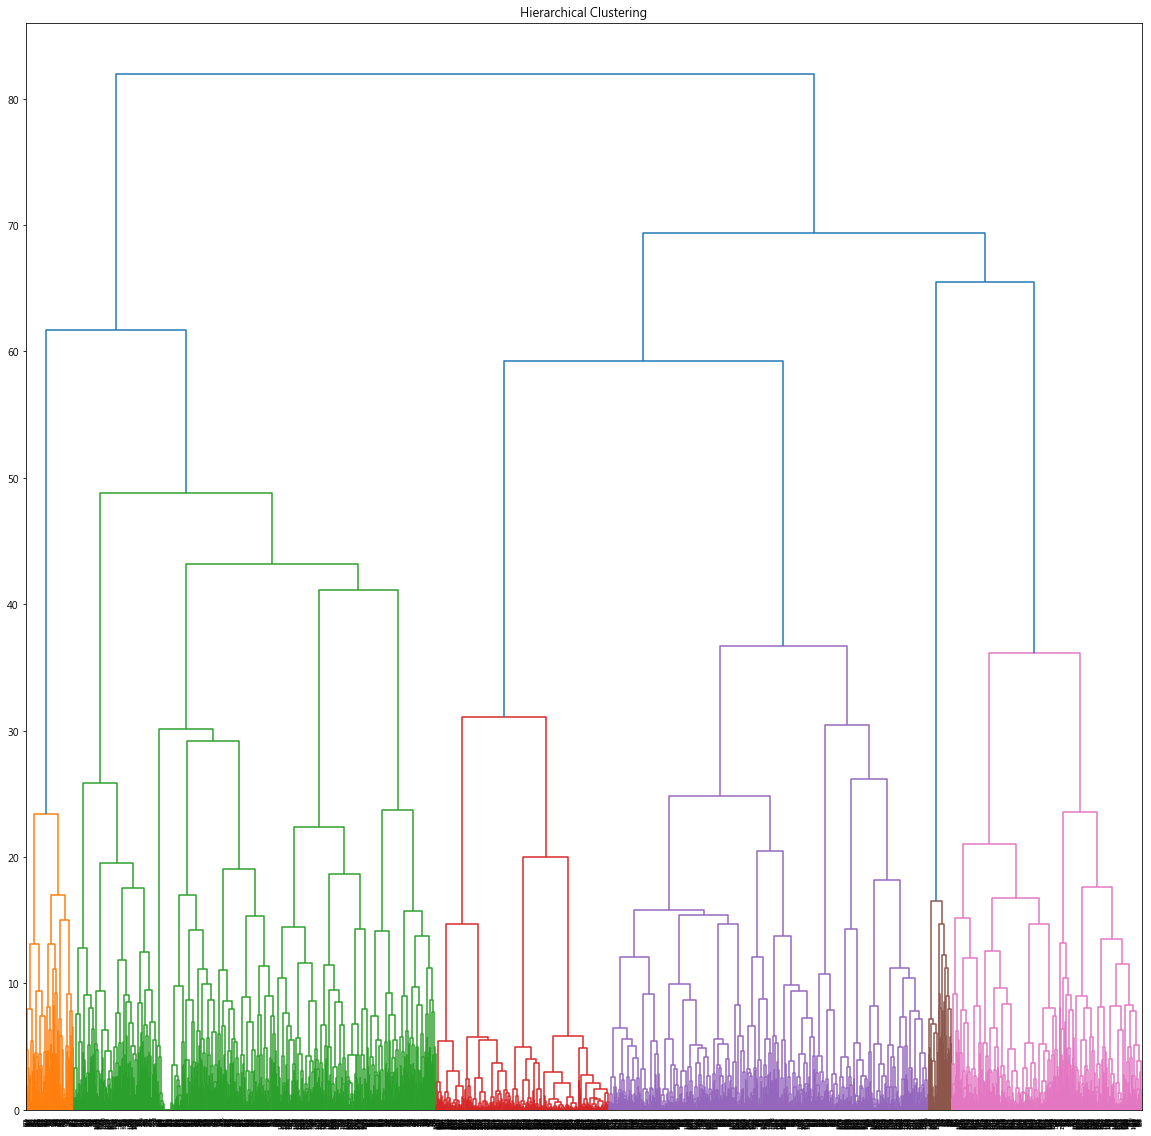

In [28]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering')
dis = sch.linkage(X, metric='euclidean', method='ward')
sch.dendrogram(dis)
plt.show()


## 選擇 eps,min_samples

NameError: name 'pred_y' is not defined

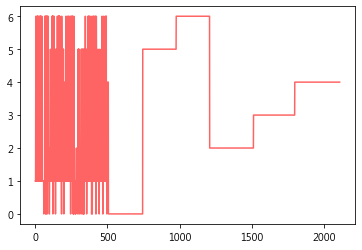

In [29]:

plt.plot(y,color=(255/255,100/255,100/255))
plt.plot(pred_y, color=(100/255,100/255,255/255))

plt.ylabel("Accuracy")
plt.xlabel("Depth_of_tree")
plt.title("Adult_dataset_accuracy")
plt.xlim([0,150])
plt.ylim([0,3])
plt.grid(True)

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=1).fit(X)
pred_y = clustering.labels_
allcol=['sepal_length', 'sepal_width',
              'petal_length', 'petal_width']
X_axis="sepal_length"

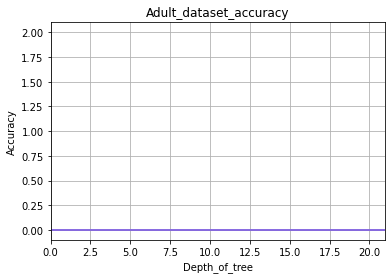

In [ ]:

plt.plot(y,color=(255/255,100/255,100/255))
plt.plot(pred_y,color=(100/255,100/255,255/255))

plt.ylabel("Accuracy")
plt.xlabel("Depth_of_tree")
plt.title("Adult_dataset_accuracy")
plt.xlim([0,21])
plt.grid(True)

plt.show()

In [ ]:

plt.scatter(X[X_axis],y,c='r')
plt.scatter(X[X_axis],pred_y,c='b')
plt.xlabel(X_axis)
plt.ylabel('y')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 432x288 with 0 Axes>

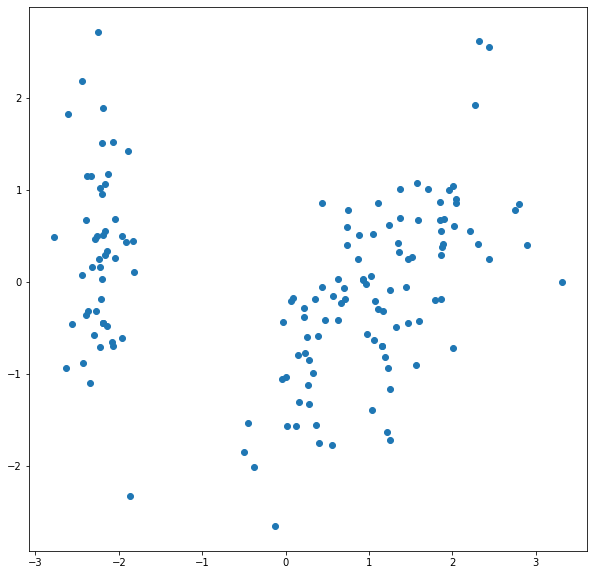

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

X_pca.shape
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:, 1])
plt.xlabel('')
plt.ylabel('')    
plt.show()

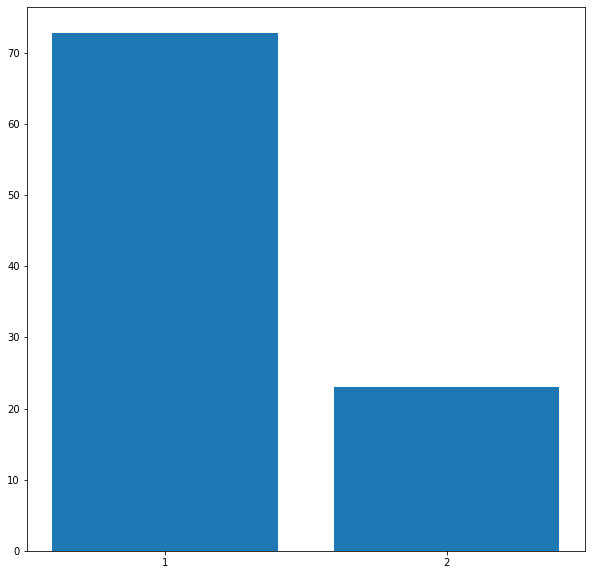

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
data = pca.fit_transform(X)
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

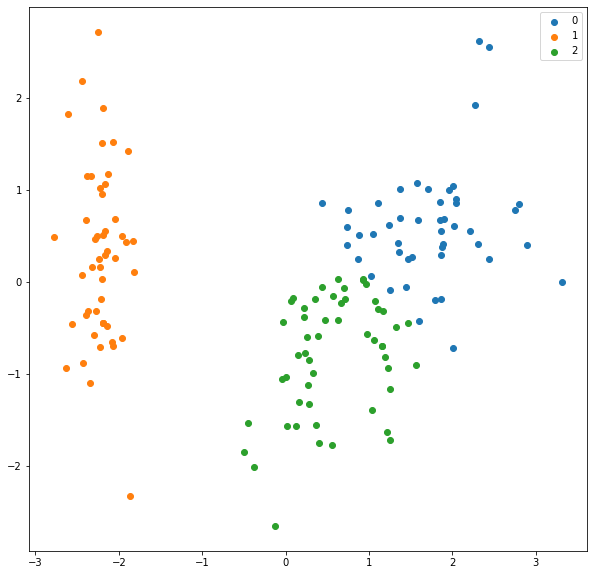

In [ ]:
from sklearn.cluster import KMeans
#centers = np.array(model2.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

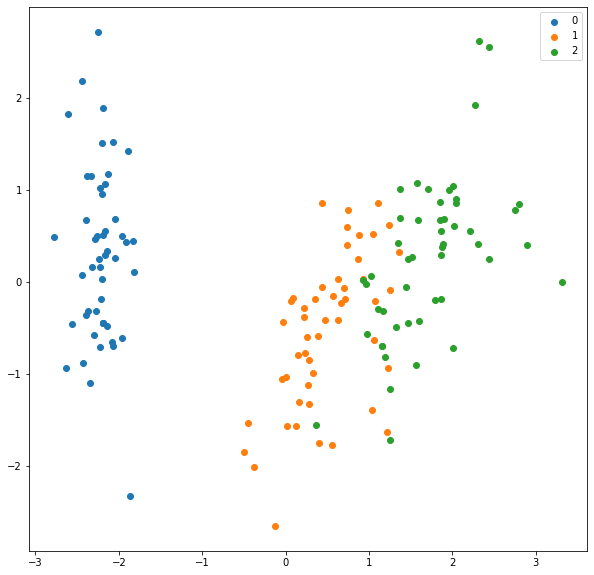

In [ ]:
plt.figure(figsize=(10,10))
uniq = np.unique(y)
for i in uniq:
   plt.scatter(data[y == i , 0] , data[y == i , 1] , label = i)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()